# Week 1 Inroduction

This is an unassessed coursework to help you learn some key Python features that you will undoubtedly need at some point during this module.
For those of you who haven't used Python before please work through [Intro-to-Python](https://gitlab.erc.monash.edu.au/andrease/Python4Maths/-/tree/master/Intro-to-Python) gitlab notebooks they provide excellent introduction to Python.
From 00-07 will be more than sufficient to get you used to Python and of course it will be better if you did more.
And for those who have previous Python experience feel free to skip them.

This coursework should be worked on during the scheduled tutorial sessions where you can ask questions if you get stuck.

In [1]:
# %matplotlib inline is a magic function for displaying the image in the notebook
%matplotlib inline
import numpy as np
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline 
#to visualize the plots within the notebook

## Task 1. Basic loading and displaying
In this task you will learn how to load, display and convert to gray scale RGB images.
### 1.1 Display image
Download a color image and place it in the images' folder if you like or use the images already there.
Now load the image and display it but be careful as different loading functions can represent images in a different datatype or different channels order.

`Hint 1: images in python can be though of as a multidimentional array`
`Hint 2: Use OpenCV to load the image`

Image shape (301, 420, 3)
[[102 164 150]
 [102 164 150]
 [ 98 163 148]
 ...
 [132 171 163]
 [130 169 161]
 [130 169 161]]
Image datatype uint8


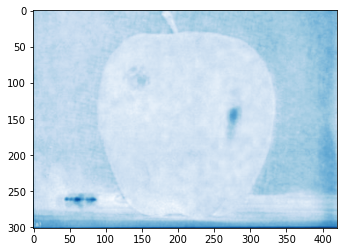

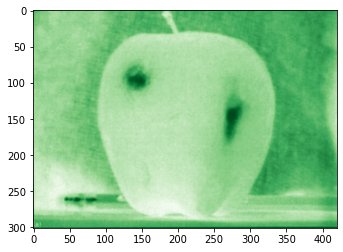

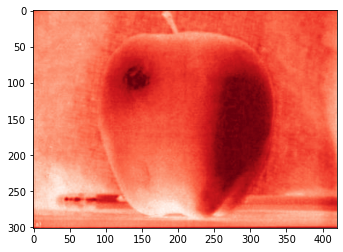

<Figure size 432x288 with 0 Axes>

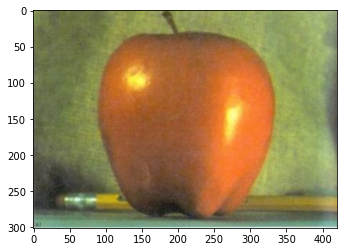

In [7]:
# fill in missing part
img = cv2.imread("../images/apple1.jpg")
print("Image shape", img.shape)
print("Image datatype", img.dtype) # replace this code and load your image

plt.figure()
plt.imshow(img[:,:,0], cmap='Blues')
plt.figure()
plt.imshow(img[:,:,1], cmap='Greens')
plt.figure()
plt.imshow(img[:,:,2], cmap='Reds')
plt.figure()
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image_rgb)
plt.show()


Play a bit with the image and understand how the images are represented in Python for example try:
- Printing the shape
- Try accessing image channels
- Display each channel separately
- Swap the channels and display the image

Did you notice any differences when you swapped the channels? or visualized only one channel ata time?

In [ ]:
print(img.shape)

# Play with the images here 

### 1.2 Convert to gray scale
`Hint: try using cvtColor from openCV packge`

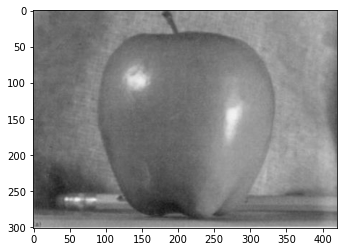

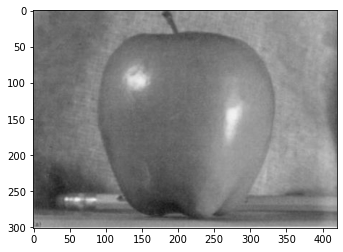

In [14]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
my_grey = to_gray(img)
plt.figure()
plt.imshow(gray_img, cmap="gray", vmin=0, vmax=255)
plt.figure()
plt.imshow(my_grey, cmap="gray", vmin=0, vmax=255)
# display the image
# display(gray_img)

Try writing your oen method to convert RGB images to gray scale.

In [13]:
def to_gray(img):
    '''
    Convert and RGB image into gray scale
    :param img: RBG image with size HxWx3
    :return: gray scaled image of size HxW
    '''
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    h,w,c = img.shape
    gray_img = img[:,:,0] * 0.114 + img[:,:,1]*0.587 + img[:,:,2]*0.299
    # Y = 0.299 * R + 0.587 * G + 0.114 * B
 # Modify this part to convert the image onto gray scale
    
    assert gray_img.shape == (h,w), 'Wrong spacial dimensions, your method should only change the channel dimension'
    return gray_img

## More advanced basics
Now we have learned how to load and display images, and we have some information about how Python represent images we can do more advance image manipulations.

### 2.1 Transpose
Flip the image across its diagonal.

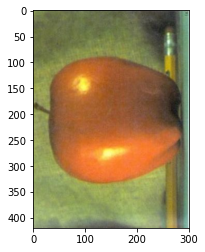

In [27]:
transposed_img = cv2.transpose(image_rgb) # replace this code and load your image
plt.imshow(transposed_img)
# display the image
# display(transposed_img)

### 2.2 Split the image
Split the image into four equal parts and display each of them.
You can display each of them separately or preferably in a single plot using `subplots`.

`Hint: Do not use for loop, try NumPy array slicing. Be carefull of the coordinate system!`

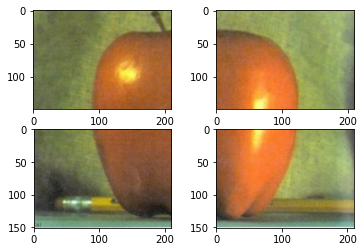

In [28]:
first_part = image_rgb[0:img.shape[0]//2 , 0:img.shape[1]//2,:]
second_part = image_rgb[0:img.shape[0]//2 , (img.shape[1]//2):] 
third_part = image_rgb[img.shape[0]//2: , 0:img.shape[1]//2]
fourth_part = image_rgb[img.shape[0]//2: , (img.shape[1]//2):]
plt.subplot(2, 2, 1)
plt.imshow(first_part)
plt.subplot(2, 2, 2)
plt.imshow(second_part)
plt.subplot(2, 2, 3)
plt.imshow(third_part)
plt.subplot(2, 2, 4)
plt.imshow(fourth_part)
# display all parts

## Scaling and loops
Use openCV python routines to scale down the image and plot them side by side with the full scaled image.
Write your own function to scale down the image using an average of 4 pixels.

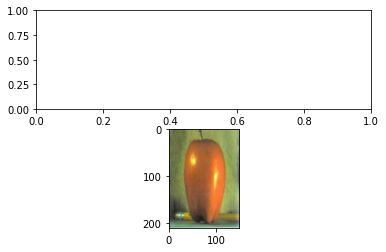

In [30]:
scaled_img = cv2.resize(image_rgb, (150, 210)) 

axes = plt.subplots(2,1)
# display original image
plt.imshow(scaled_img)

# display scaled down image

In [ ]:
def average_scale_down(img):
    '''
    Scale down and RGB image
    :param img: RBG image with size HxWx3
    :return: scaled_img: RBG scaled down image with size (H/4)x(W/4)x3
    '''
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    h,w,c = img.shape
    scaled_img = img # Modify this part to convert the image onto gray scale

    assert scaled_img.shape == (h//2,w//2, 3), f'Wrong spacial dimensions, your method should reduce the spacial dimensions by a factor of four we expect {(h//2,w//2, 3)} instead we have {scaled_img.shape}'
    return scaled_img

Similarly, how can you double the size of an image?
What sort of artefacts are visible if you do so?
Try and code this out yourself.

### Advanced
Nested loops can take a lot of time you may already noticed, rewrite your scale down function without using loops.

`Hint: make use of extrcat 2d pathes in sklearn already implemented for you in utils`